<a href="https://colab.research.google.com/github/CalebAnderson22/PHY122/blob/main/N2L_Anderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title-of-Work

Your Name

Date

#  <font color='Red'> **Import Necessary Modules** </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, sqrt, array, zeros
from numpy.linalg import norm

π = np.pi

def d(X):
    return np.gradient(X, axis=0)

###  <font color='Red'> Before we start lets define the times in which all our experiments will take place. </font>

###  <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [2]:
dt = 0.1  ## s (detector time resolution, time-step)
t0 = 0.0  ## s (initial experiment time)
tf = 10.  ## s (final   experiment time)

T  = arange(t0, tf, dt)

print(T)
print("we have " + str(len(T)) + " time points")

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
we have 100 time points


#   <font color='Red'> **Experiment I: Gravity Free-Fall** </font>

##   <font color='Red'> To begin lets start with by defining an initial position, initial velocity, and mass. </font>

In [3]:
x_0  = array([0., 0., 0.]) ## m : initial position vector/array
v_0  = array([0., 0., 0.]) ## m/s : initial velocity vector/array
m    =  10.00   ## kg : mass of your particle
g    = -9.81    ## m/s/s : surface-gravity

##   <font color='Red'> Now lets define our force as a function of time, f_t . </font>

In [4]:
f_gravity      = zeros( (len(T), 3) ) ## initialize an empty (i.e. zero-filled) 'force-trajectory' array
f_gravity[:,0] = m * g ## fill-in all entries of axis-0, i.e. the x-axis, for all, hence ":" time-points

##   <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [5]:
R_tx = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
V_tx = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
A_tx = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

R_tx[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
V_tx[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
A_tx[0] = f_gravity[0] / m ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  R_tx[t] = R_tx[t-1] + V_tx[t-1] * dt + 0.5 * A_tx[t-1] * dt*dt ## Velocity-Verlet Step 1 : find new position from old data
  A_tx[t] = f_gravity[t-1] / m ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  V_tx[t] = V_tx[t-1] + 0.5 * ( A_tx[t-1] + A_tx[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

###   <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###   <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

In [6]:
dRdt_tx = d(R_tx)/dt ## take numerical-time-derivative of the aforementioned position-trajectory
dVdt_tx = d(V_tx)/dt ## take numerical-time-derivative of the aforementioned velocity-trajectory

###   <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dv/dt_t, & f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

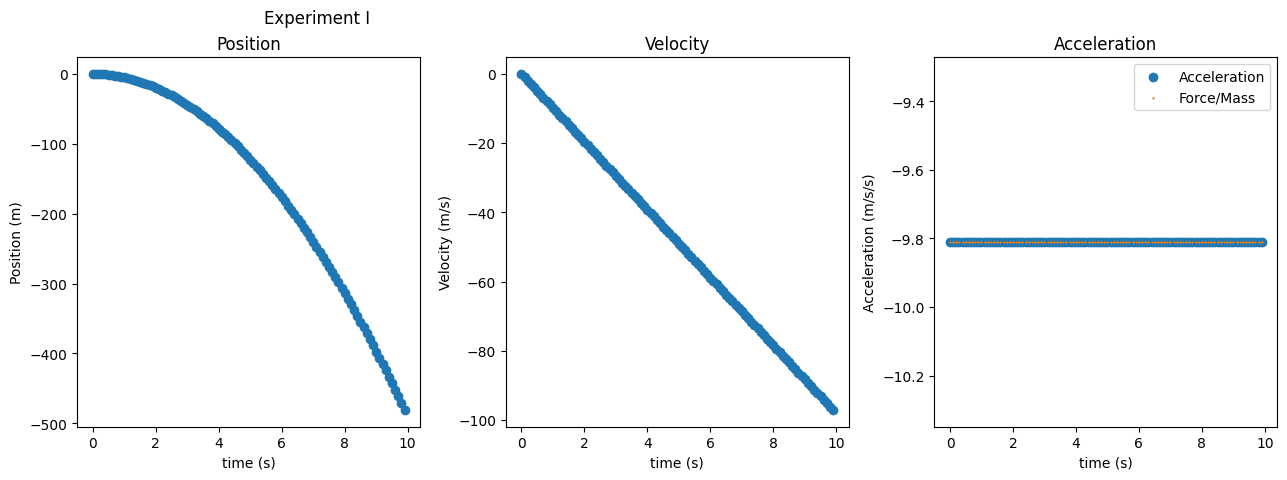

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, R_tx[:,0])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(T, V_tx[:,0])
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(T, A_tx[:,0], label="Acceleration")
ax3.scatter(T, f_gravity[:,0]/m, s=0.5, label="Force/Mass")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

###   <font color='Red'> Let's replot these graphs but for the magnitude of the vectors. </font>

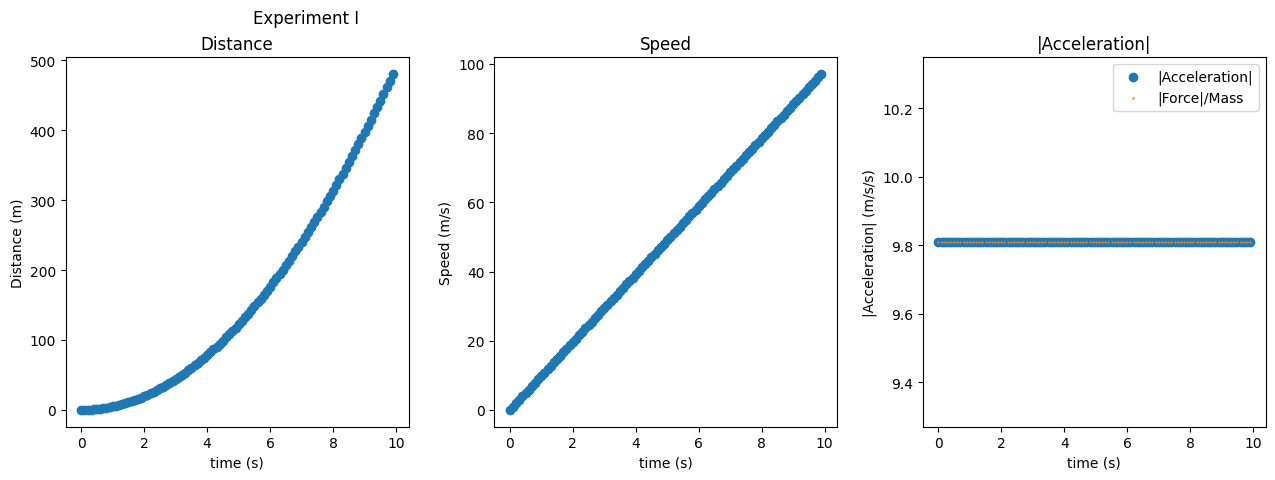

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, norm(R_tx, axis=1))
ax1.set_title("Distance")
ax1.set(xlabel='time (s)', ylabel='Distance (m)')

ax2.scatter(T, norm(V_tx, axis=1))
ax2.set_title("Speed")
ax2.set(xlabel='time (s)', ylabel='Speed (m/s)')

ax3.scatter(T, norm(A_tx, axis=1), label="|Acceleration|")
ax3.scatter(T, norm(f_gravity, axis=1)/m, s=0.5, label="|Force|/Mass")
ax3.legend(loc="upper right")
ax3.set_title("|Acceleration|")
ax3.set(xlabel='time (s)', ylabel='|Acceleration| (m/s/s)')

fig.show()

#   <font color='Red'> **Experiment II: Forces on a Cart I** </font>

###  <font color='Red'> To begin lets start with by defining an initial position & velocity, and mass. </font>

In [9]:
x_0  = array([1., 0., 0.]) ## m : initial position vector/array
v_0  = array([5., 0., 0.]) ## m/s : initial velocity vector/array
m    = 5.0 ## kg : mass of your particle

###  <font color='Red'> Define a force as a function of time, with a bump function. Plot the result in time. </font>

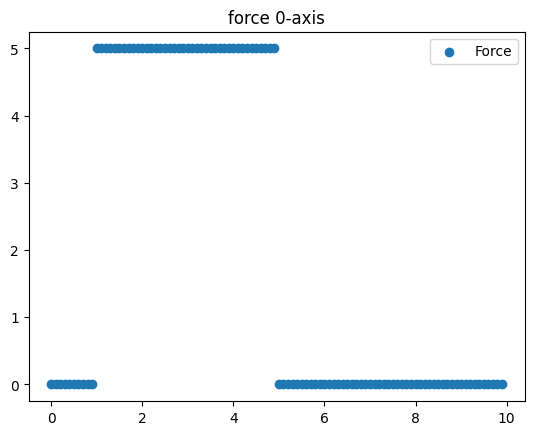

In [10]:
F_tx          = zeros( (len(T), 3) ) ## initialize an empty (ie zero-filled) 'force-trajectory' array
F_tx[10:50,:] = 5*array([1.,0.,0.])  ## take entries 10-through-50 and fill-in with given vector/array

### plot 0-axis force
plt.scatter(T, F_tx[:,0], label="Force")
plt.legend(loc="upper right")
plt.title("force 0-axis")
plt.show()

###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [11]:
R_tx = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
V_tx = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
A_tx = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

R_tx[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
V_tx[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
A_tx[0] = F_tx[0] / m ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  R_tx[t] = R_tx[t-1] + V_tx[t-1] * dt + 0.5 * A_tx[t-1] * dt*dt ## Velocity-Verlet Step 1 : find new position from old data
  A_tx[t] = F_tx[t-1] / m ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  V_tx[t] = V_tx[t-1] + 0.5 * ( A_tx[t-1] + A_tx[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

###  <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###  <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>


In [12]:
dRdt_tx = d(R_tx)/dt ## take numerical-time-derivative of the aforementioned position-trajectory
dVdt_tx = d(V_tx)/dt ## take numerical-time-derivative of the aforementioned velocity-trajectory

###  <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dv/dt_t, and f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>


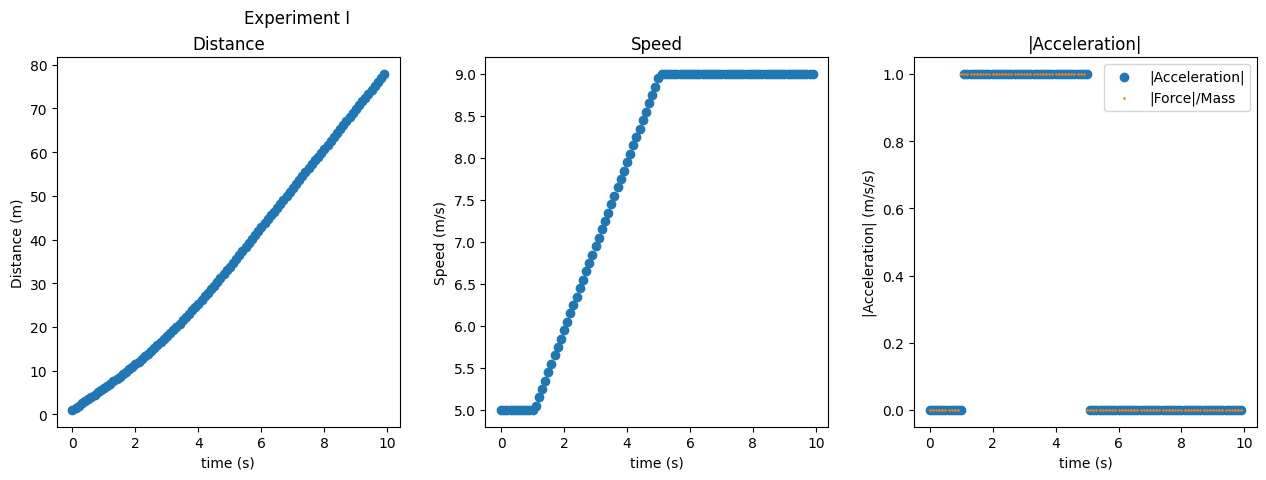

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, norm(R_tx, axis=1))
ax1.set_title("Distance")
ax1.set(xlabel='time (s)', ylabel='Distance (m)')

ax2.scatter(T, norm(V_tx, axis=1))
ax2.set_title("Speed")
ax2.set(xlabel='time (s)', ylabel='Speed (m/s)')

ax3.scatter(T, norm(A_tx, axis=1), label="|Acceleration|")
ax3.scatter(T, norm(F_tx, axis=1)/m, s=0.8, label="|Force|/Mass")
ax3.legend(loc="upper right")
ax3.set_title("|Acceleration|")
ax3.set(xlabel='time (s)', ylabel='|Acceleration| (m/s/s)')

fig.show()

#   <font color='Red'> **Experiment III: Forces on a Cart II** </font>

###   <font color='Red'> To begin lets start with by defining an initial mass, position, & velocity. </font>

In [14]:
x_0 = array([10., 0., 0.]) ## m : initial position vector/array
v_0 = array([ 1., 0., 0.]) ## m/s : initial velocity vector/array
m   = 5.0 ## kg : mass of your particle

###   <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [15]:
dt = 0.01  ## s (detector time resolution, time-step)
t0 = 0.00  ## s (initial experiment time)
tf = 10.0  ## s (final   experiment time)

T  = arange(t0, tf, dt) ## make time-array

print("we have " + str(len(T)) + " time points")

we have 1000 time points


###   <font color='Red'> Define a force as a function of time, with a bump function. Plot the result in time. </font>

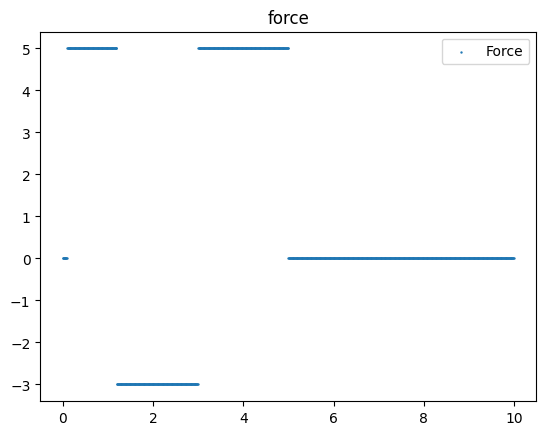

In [16]:
F_tx = zeros( (len(T), 3) ) ## initialize an empty (ie zero-filled) 'force-trajectory' array
F_tx[10:500]  =  5*array([1.,0.,0.]) ## take entries 10-through-500 and fill-in with given vector/array
F_tx[120:300] = -3*array([1.,0.,0.]) ## take entries 120-through-300 and fill-in with given vector/array

### plot force-trajectory on 0-axis
plt.scatter(T, F_tx[:,0], s=0.5, label="Force")
plt.legend(loc="upper right")
plt.title("force")
plt.show()

###   <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [17]:
R_tx = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
V_tx = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
A_tx = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

R_tx[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
V_tx[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
A_tx[0] = F_tx[0] / m ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  R_tx[t] = R_tx[t-1] + V_tx[t-1] * dt + 0.5 * A_tx[t-1] * dt*dt ## Velocity-Verlet Step 1 : find new position from old data
  A_tx[t] = F_tx[t-1] / m ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  V_tx[t] = V_tx[t-1] + 0.5 * ( A_tx[t-1] + A_tx[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

###   <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###   <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>


In [18]:
dRdt_tx = d(R_tx)/dt ## take numerical-time-derivative of the aforementioned position-trajectory
dVdt_tx = d(V_tx)/dt ## take numerical-time-derivative of the aforementioned velocity-trajectory

###   <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dvdt_t, and f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

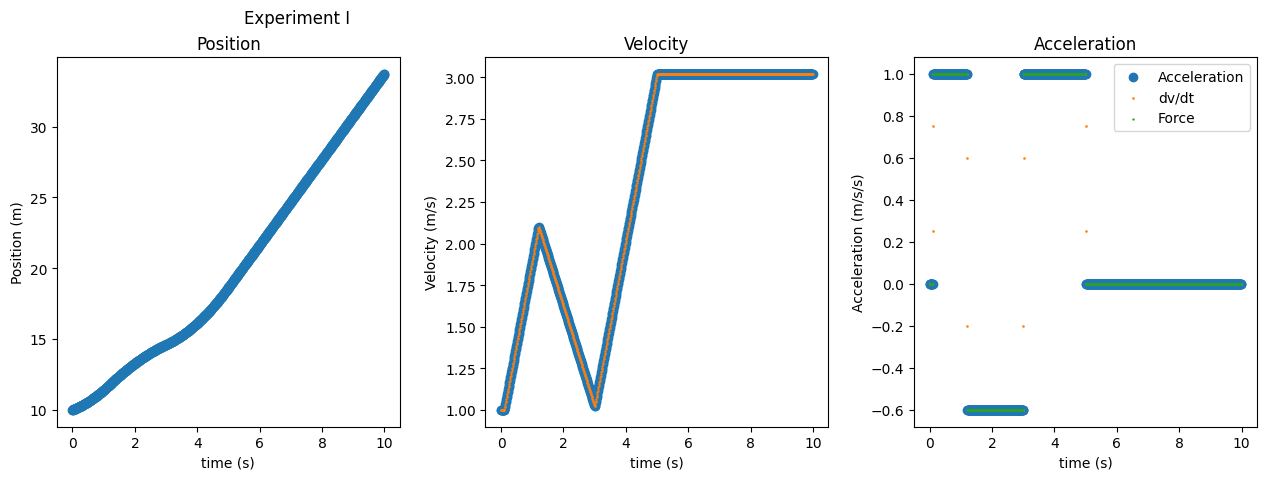

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, R_tx[:,0])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(T, V_tx[:,0])
ax2.scatter(T, dRdt_tx[:,0], s=0.5)
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(T, A_tx[:,0], label="Acceleration")
ax3.scatter(T, dVdt_tx[:,0], s=0.75, label="dv/dt")
ax3.scatter(T, F_tx[:,0]/m, s=0.5, label="Force")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

###   <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###   <font color='Red'> Demostrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>

###   <font color='Red'> Is the Force Proportional to the Acceleration? </font>

####   <font color='Red'> Answer while referencing your simulations. </font>

###   <font color='Red'> Do objects with different masses fall at the same rate? </font>

####   <font color='Red'> That is neglecting air-resistance and in the same environment. Answer while referencing your simulations. </font>